<a href="https://colab.research.google.com/github/ChristopherOwen1212/Machine-Learning-Exercises/blob/master/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import required packages

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.graphics.gofplots import qqplot

Load & profile the data

In [2]:
Data = pd.read_csv("listings.csv")
print(Data.dtypes)
print(Data.isna().values.any())

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object
True


Histogram Plot for availability_365 column

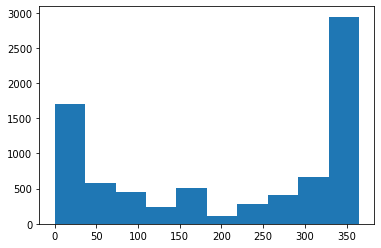

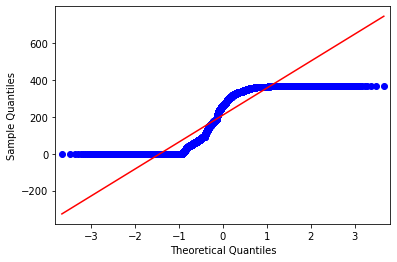

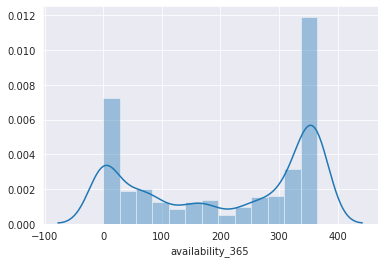

In [3]:
plt.hist(Data["availability_365"])
qqplot(Data["availability_365"], line='s')
plt.show()
sb.set_style('darkgrid')
sb.distplot(Data["availability_365"])

Plot all numeric data and find the regression line

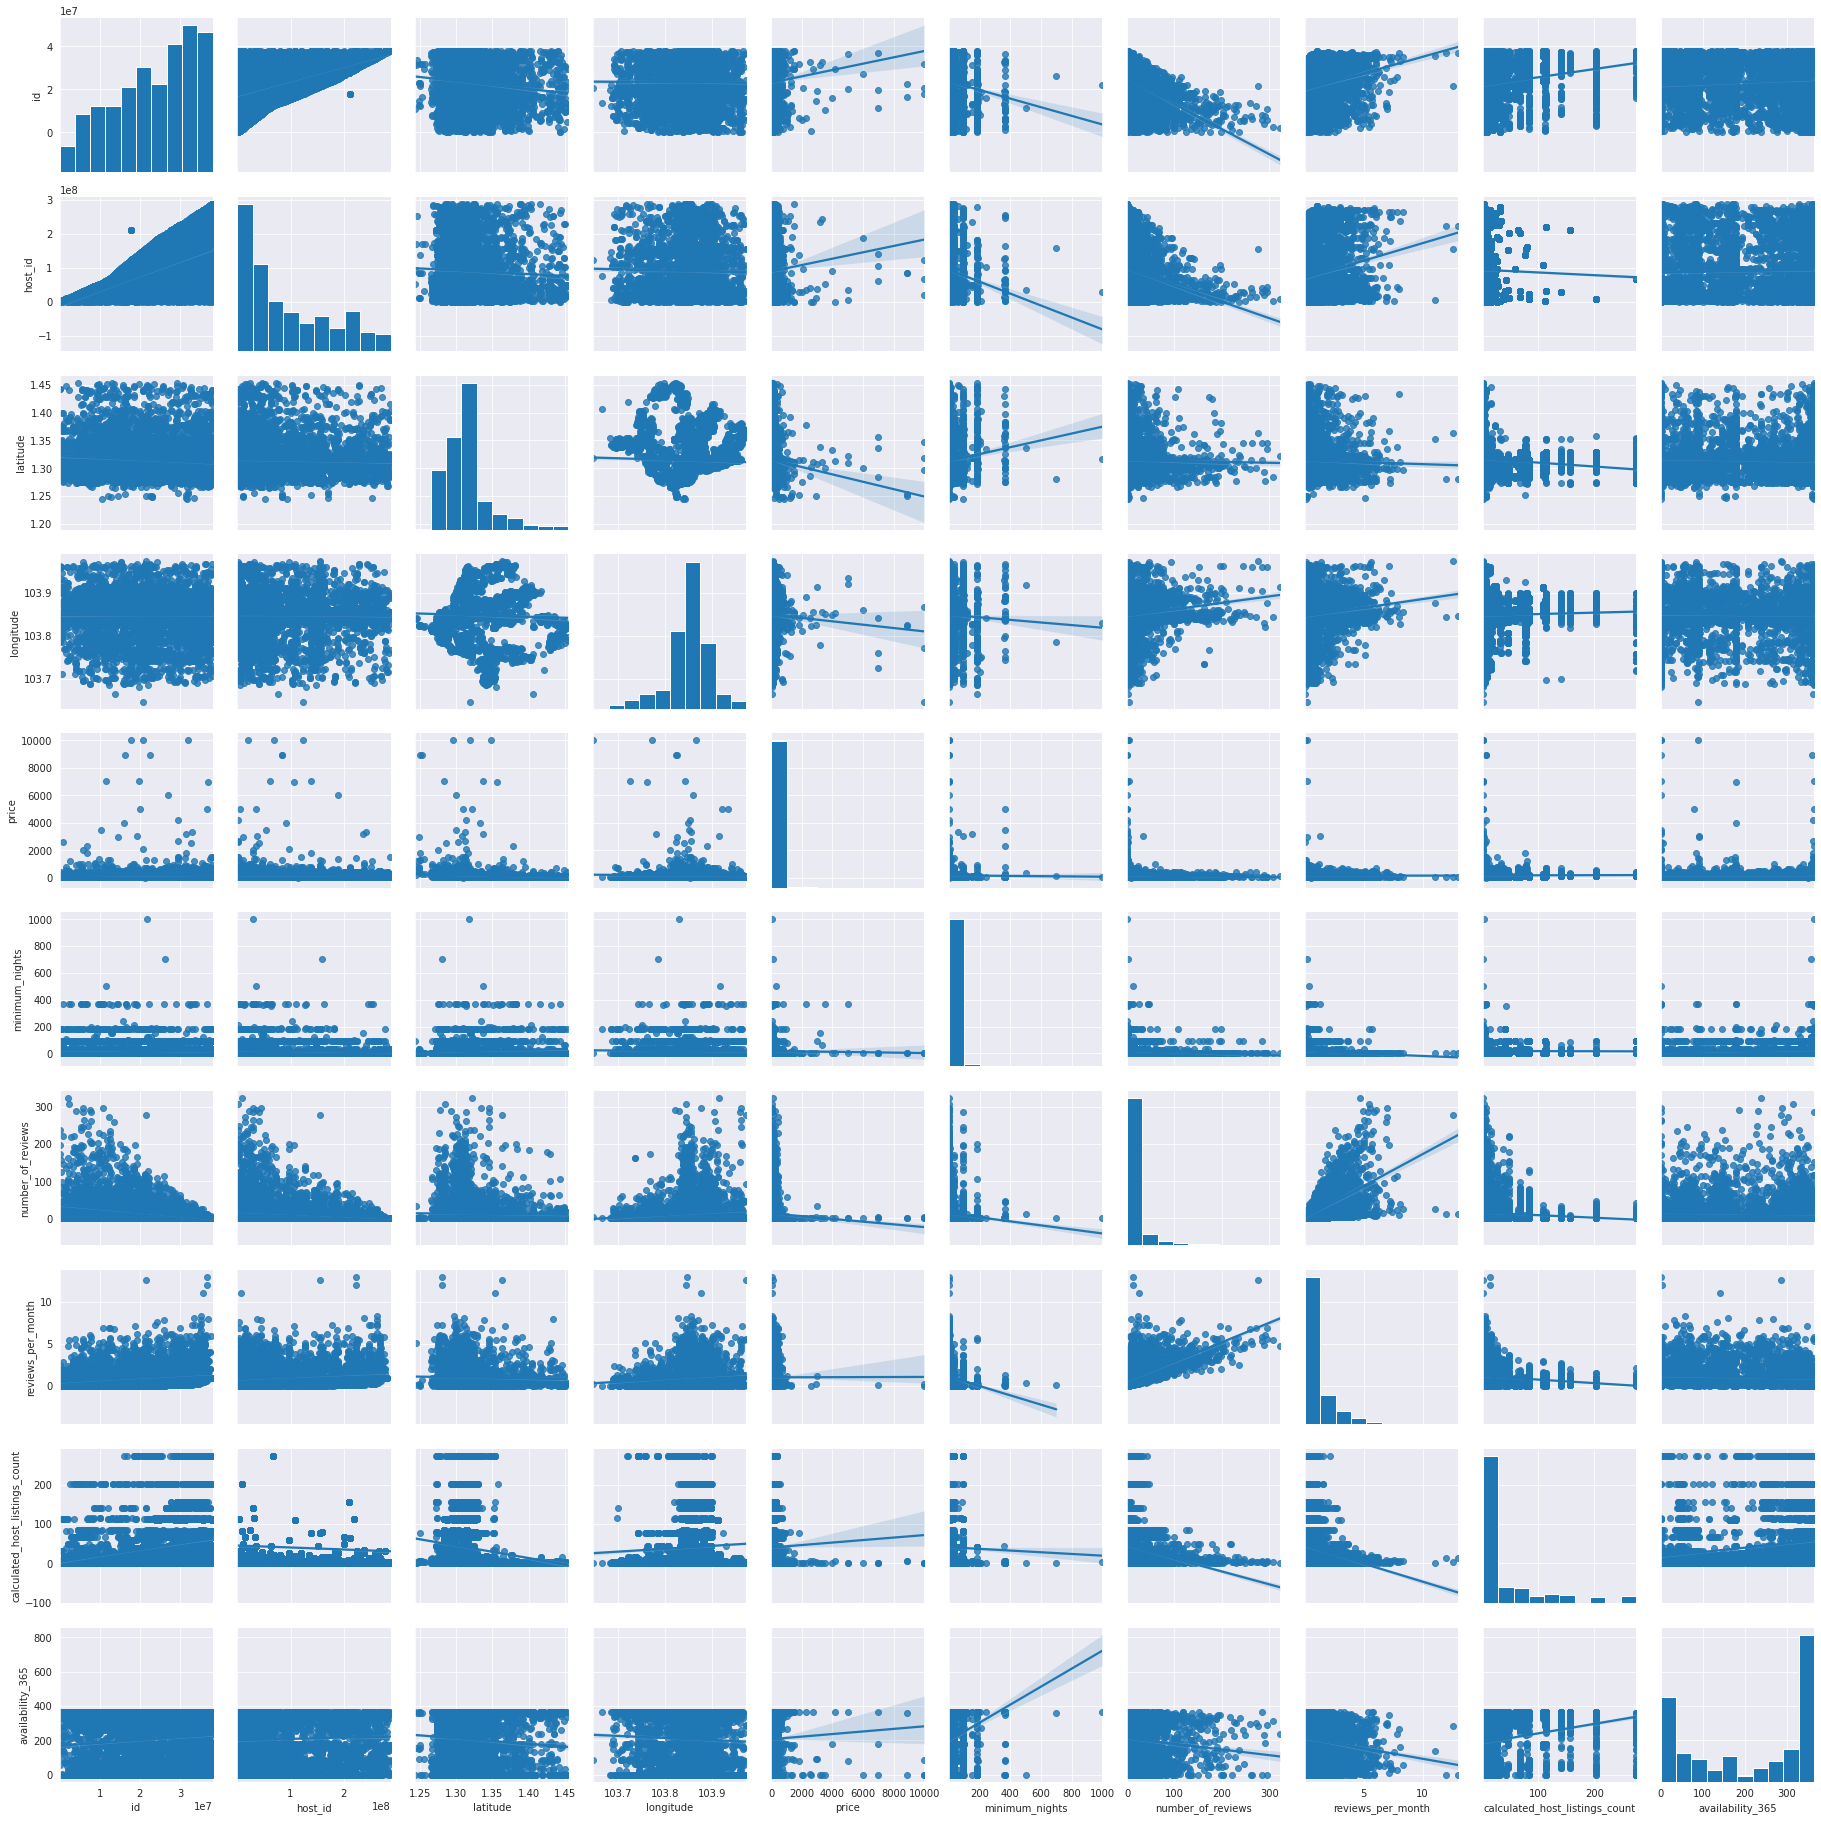

In [4]:
sb.pairplot(Data,kind='reg')

Finding Mean, standard deviation, and skewness from data

In [5]:
#creating data frame
df = pd.DataFrame(Data)
#formating output
pd.options.display.float_format = "{:,.3f}".format
print('mean:')
print(df.mean())
print('\n\nstandard deviation:')
print(df.std())
print('\n\nskewness:')
print(df.skew())

mean:
id                               23,388,624.630
host_id                          91,144,807.405
latitude                                  1.314
longitude                               103.849
price                                   169.333
minimum_nights                           17.510
number_of_reviews                        12.807
reviews_per_month                         1.044
calculated_host_listings_count           40.608
availability_365                        208.726
dtype: float64


standard deviation:
id                               10,164,162.066
host_id                          81,909,095.305
latitude                                  0.031
longitude                                 0.044
price                                   340.188
minimum_nights                           42.095
number_of_reviews                        29.708
reviews_per_month                         1.286
calculated_host_listings_count           65.135
availability_365                        146.1

Find normal (gaussian) distribution for availability_365 column

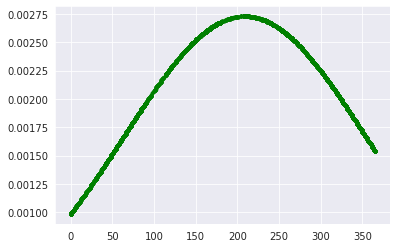

In [6]:
#method 1
import scipy.stats as stats
import pylab as pl

fit = stats.norm.pdf(Data["availability_365"], np.mean(Data["availability_365"]), np.std(Data["availability_365"]))  
pl.plot(Data["availability_365"],fit,'g.')
pl.show()   

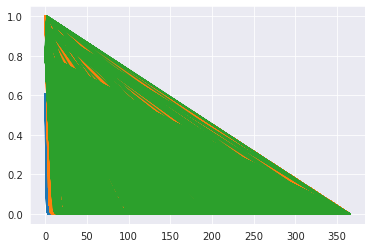

In [7]:
#method 2
from matplotlib import pyplot as mp
import numpy as np

def gaussian(x,x0,sigma):
  return np.exp(-np.power((x - x0)/sigma, 2.)/2.)

x_values = Data["availability_365"]
for mu, sig in [(-1, 1), (0, 2), (2, 3)]:
    mp.plot(x_values, gaussian(x_values, mu, sig))

mp.show()

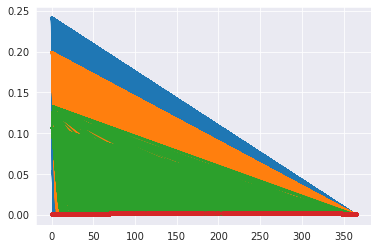

In [8]:
#method 3 + pdf
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np 

#initialize a normal distribution with frozen in mean=-1, std. dev.= 1
rv = norm(loc = -1., scale = 1.0)
rv1 = norm(loc = 0., scale = 2.0)
rv2 = norm(loc = 2., scale = 3.0)
rv3 = norm(loc = np.mean( Data["availability_365"]), scale = np.std(Data["availability_365"]))

x =  Data["availability_365"]

#plot the pdfs of these normal distributions 
plt.plot(x, rv.pdf(x), x, rv1.pdf(x), x, rv2.pdf(x), x, rv3.pdf(x),'.')

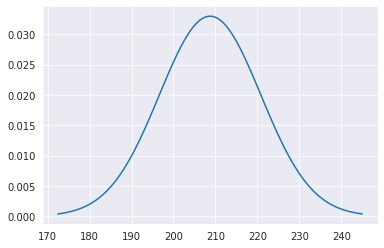

In [9]:
#method 4
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = np.mean( Data["availability_365"])
variance = np.std( Data["availability_365"])
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


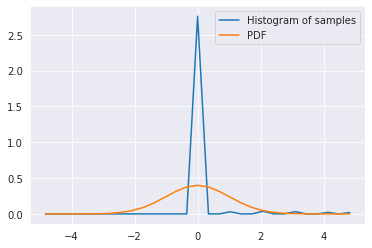

In [10]:
#method 5
import numpy as np

# Sample from a normal distribution
samples = Data["availability_365"]

# Compute a histogram of the sample
bins = np.linspace(-5, 5, 30)
histogram, bins = np.histogram(samples, bins=bins, normed=True)

bin_centers = 0.5*(bins[1:] + bins[:-1])

# Compute the PDF on the bin centers from scipy distribution object
from scipy import stats
pdf = stats.norm.pdf(bin_centers)

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(bin_centers, histogram, label="Histogram of samples")
plt.plot(bin_centers, pdf, label="PDF")
plt.legend()
plt.show()

0.0009662426101651543
0.0
7.965726382235402e-07


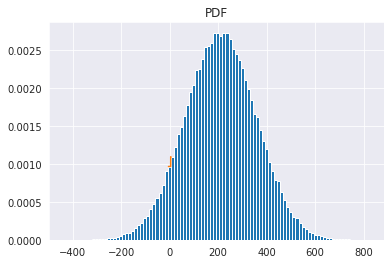

In [11]:
#method 6
import scipy.stats
import numpy as np
data = scipy.stats.norm.rvs(size=100000, loc=np.mean( Data["availability_365"]), scale=np.std( Data["availability_365"]), random_state=123)
hist = np.histogram(data, bins=100)
hist_dist = scipy.stats.rv_histogram(hist)
print(hist_dist.pdf(1.0))
print(hist_dist.pdf(np.max(data)))
print(hist_dist.pdf(np.min(data)))
import matplotlib.pyplot as plt
X = np.linspace(-5.0, 5.0, 100)
plt.title("PDF")
plt.hist(data, density=True, bins=100)
plt.plot(X, hist_dist.pdf(X), label='PDF')
plt.show()

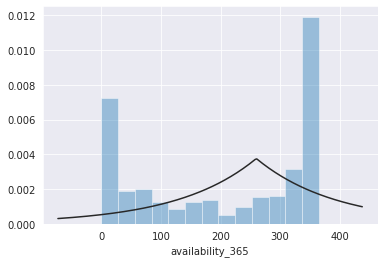

In [12]:
#histogram with laplace distribution
sb.distplot(Data["availability_365"], fit=stats.laplace, kde=False)